In [2]:
import networkx as nx
import numpy as np
from numpy import linalg as LA

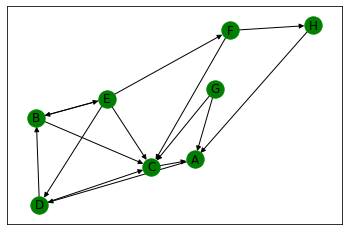

In [3]:
g = nx.DiGraph()
g.add_nodes_from(['A','B','C','D','E','F','G','H'])
g.add_edges_from([('A', 'D'),('B','C'),('B','E'),('C','A'),('D','B'),('D','C'),('E','F'),('E','B'),('E','C'),('E','D'),
                  ('F','C'),('F','H'),('G','C'),('G','A'),('H','A')])
nx.draw_networkx(g, node_color ='green')

In [8]:
# Out Degree
adj_list={}
for node in g.nodes():
    adj_list[node]=[]
    for nei in g.neighbors(node):
        adj_list[node].append(nei)
print(adj_list)

{'A': ['D'], 'B': ['C', 'E'], 'C': ['A'], 'D': ['B', 'C'], 'E': ['F', 'B', 'C', 'D'], 'F': ['C', 'H'], 'G': ['C', 'A'], 'H': ['A']}


In [14]:
# In Degree
from collections import defaultdict
inb=defaultdict(list)
for k,v in zip(adj_list,adj_list.values()):
    for i in v:
        inb[i].append(k)
inb  

defaultdict(list,
            {'D': ['A', 'E'],
             'C': ['B', 'D', 'E', 'F', 'G'],
             'E': ['B'],
             'A': ['C', 'G', 'H'],
             'B': ['D', 'E'],
             'F': ['E'],
             'H': ['F']})

In [28]:
# Page Ranking Algorithm
pr=np.ones(len(g.nodes))
pr2=pr.copy()
d=0.7
for i in g.nodes:
    pr2[ord(i)-ord('A')]=(1-d)/len(g.nodes)
    incal=0
    for j in inb[i]:
        incal+=pr[ord(j)-ord('A')]/len(adj_list[j])
    pr2[ord(i)-ord('A')]+=d*(incal)
print(pr2)

[1.7875 0.5625 1.6125 0.9125 0.3875 0.2125 0.0375 0.3875]


In [30]:
# Hubs & Authority Algorithm
a=np.ones(len(g.nodes))
h=np.ones(len(g.nodes))
a1=a.copy()
h1=h.copy()
for i in g.nodes:
    a1[ord(i)-ord('A')]=0
    for j in inb[i]:
        a1[ord(i)-ord('A')]+=h[ord(j)-ord('A')]
    for j in adj_list[i]:
        h1[ord(i)-ord('A')]+=a[ord(j)-ord('A')]
print(a1)
print(h1)

[3. 2. 5. 2. 1. 1. 0. 1.]
[2. 3. 2. 3. 5. 3. 3. 2.]
